In [1]:
# Import pandas package
import pandas as pd
import matplotlib.pyplot as plt
# Define a dictionary containing employee data
data = {'Name':['Jai', 'Princi', 'Gaurav', 'Anuj'],
		'Age':[27, 24, 22, 32],
		'Address':['Delhi', 'Kanpur', 'Allahabad', 'Kannauj'],
		'Qualification':['Msc', 'MA', 'MCA', 'Phd']}

# Convert the dictionary into DataFrame 
df = pd.DataFrame(data)

# select two columns
print(df[['Name', 'Age']])


Matplotlib is building the font cache; this may take a moment.


     Name  Age
0     Jai   27
1  Princi   24
2  Gaurav   22
3    Anuj   32


In [2]:
ps4 = pd.read_csv("./PS4_GamesSales.csv")
display(ps4)


,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [12]:
ps4.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [39]:
#this does not compute anything it just creates a groupby object which needs to be further given instructions
publisher = ps4.groupby("Publisher")  
# print(publisher.groups)
ps4.sort_values(by="Publisher", ascending=False)

# condition = ((ps4['Publisher'].notna()) & (ps4['Year'].isna())) | ((ps4['Publisher'].isna()) & (ps4['Year'].notna()))
# ps4[condition] 
# above analysis result is that in Year and Publisher are together null whereever in the data.

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global


From above analysis result is that in Year and Publisher are together null whereever in the data.

In [40]:
# Show rows where any column has a null value
null_rows = ps4[ps4.isna().any(axis=1)]

print(null_rows)


                                    Game  Year         Genre Publisher  \
447              Ultra Street Fighter IV   NaN      Fighting       NaN   
466                Dragon's Dogma Online   NaN  Role-Playing       NaN   
630                     This War of Mine   NaN        Action       NaN   
724                   A Boy and His Blob   NaN      Platform       NaN   
727                        Another World   NaN     Adventure       NaN   
...                                  ...   ...           ...       ...   
1019            Sakuna: Of Rice and Ruin   NaN        Action       NaN   
1029  Fallen Legion: Flames of Rebellion   NaN  Role-Playing       NaN   
1031                The Mummy Demastered   NaN        Action       NaN   
1032          Project Nimbus: Code Mirai   NaN        Action       NaN   
1033                 Battle Chef Brigade   NaN        Action       NaN   

      North America  Europe  Japan  Rest of World  Global  
447             0.0    0.08   0.00           0.01  

In [65]:
# ps4["Year"] = ps4["Year"].fillna(ps4["Year"].rolling(window=5, min_periods=1).mean().round(0))
# ps4["Year"] = ps4['Year'].fillna(ps4['Year'].rolling(window=5, min_periods=1).mean().round().astype(int))
# ps4["Year"] = ps4['Year'].fillna(ps4['Year'].rolling(window=5, min_periods=1).mean()).round(0)
ps4['Year'] = ps4['Year'].fillna(ps4['Year'].rolling(window=5, min_periods=1).mean().round(0))
display(ps4)

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,2018.0,Role-Playing,Unknown,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,2017.0,Action,Unknown,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,2018.0,Action,Unknown,0.00,0.00,0.00,0.00,0.00


Filled the missing Year Values by rolling method used mean values from previous 5 rows 

In [66]:
# line below wont work for NaN values, will only replace "" values with Unknown
# ps4["Publisher"].replace("", "Unknown")

#.fillna replaces all null values including NaN with something
ps4["Publisher"] = ps4["Publisher"].fillna("Unknown")



In [67]:
ps4

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,2018.0,Role-Playing,Unknown,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,2017.0,Action,Unknown,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,2018.0,Action,Unknown,0.00,0.00,0.00,0.00,0.00


In [68]:
#to check null
ps4["Publisher"].isnull().sum()


np.int64(0)

In [69]:
ps4

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,2018.0,Role-Playing,Unknown,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,2017.0,Action,Unknown,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,2018.0,Action,Unknown,0.00,0.00,0.00,0.00,0.00


In [70]:
# ps4.sort_values(["Global"])
# ps4.sort_values("Global")
ps4.sort_values("Global", ascending=False)

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
817,Toukiden: The Age of Demons,2014.0,Action,Tecmo Koei,0.00,0.00,0.00,0.00,0.00
816,Pinball Arcade,2013.0,Misc,FarSight Studios,0.00,0.00,0.00,0.00,0.00
815,Soul Saga,2014.0,Misc,Unknown,0.00,0.00,0.00,0.00,0.00
814,Home - a Unique Horror Adventure,2014.0,Misc,Unknown,0.00,0.00,0.00,0.00,0.00


In [71]:
# ps4.query('Game and Japan')

ps4.loc[ps4["Japan"].idxmin()]

Game                                    Mortal Kombat X
Year                                             2015.0
Genre                                          Fighting
Publisher        Warner Bros. Interactive Entertainment
North America                                      1.94
Europe                                             0.94
Japan                                               0.0
Rest of World                                      0.61
Global                                             3.49
Name: 42, dtype: object

In [72]:
# To check sales for a particular game 
ps4.loc[ps4["Game"] == "Grand Theft Auto V"]

# To check sales for a particular game in particular Country(column)
ps4.loc[ps4["Game"] == "Grand Theft Auto V", ["Global"]]

,Global
0,19.39


In [73]:
# Below wont work as & operater checks for boolean and index value on right which results in empty frame as combined condition doesnt make sense.
# ps4.loc[(ps4["Year"] == 2015) & (ps4["Global"].idxmax()) ]

# Working Method
#First save results to another object
filtered_ps4 = ps4.loc[ps4["Year"] == 2015]
#Then apply .idxmax() to the object
filtered_ps4.loc[filtered_ps4["Global"].idxmax()]

Game             Call of Duty: Black Ops 3
Year                                2015.0
Genre                              Shooter
Publisher                       Activision
North America                         6.18
Europe                                6.05
Japan                                 0.41
Rest of World                         2.44
Global                               15.09
Name: 1, dtype: object

In [74]:
filtered_ps4 = ps4.loc[ps4["Genre"] == "Action"]
ps4.loc[ps4["Year"] == 2016, ["Game", "Genre", "Year"]]

,Game,Genre,Year
5,FIFA 17,Sports,2016.0
6,Uncharted (PS4),Action,2016.0
8,Call of Duty: Infinite Warfare,Shooter,2016.0
13,Battlefield 1,Shooter,2016.0
22,Final Fantasy XV,Role-Playing,2016.0
...,...,...,...
998,Alekhine's Gun,Action,2016.0
1002,Fallen Legion,Role-Playing,2016.0
1014,Berserk Musou,Action,2016.0
1015,Ginger: Beyond the Crystal,Platform,2016.0


In [75]:
filtered_ps4 = ps4.loc[ps4["Publisher"] == "Activision"]
filtered_ps4 = filtered_ps4.loc[ps4["North America"].idxmax()]
print(filtered_ps4)

Game             Call of Duty: Black Ops 3
Year                                2015.0
Genre                              Shooter
Publisher                       Activision
North America                         6.18
Europe                                6.05
Japan                                 0.41
Rest of World                         2.44
Global                               15.09
Name: 1, dtype: object


In [76]:
ps4.loc[:,["Game" , "Year", "Global"]]

,Game,Year,Global
0,Grand Theft Auto V,2014.0,19.39
1,Call of Duty: Black Ops 3,2015.0,15.09
2,Red Dead Redemption 2,2018.0,13.94
3,Call of Duty: WWII,2017.0,13.40
4,FIFA 18,2017.0,11.80
...,...,...,...
1029,Fallen Legion: Flames of Rebellion,2018.0,0.00
1030,Radial G Racing Revolved,2017.0,0.00
1031,The Mummy Demastered,2017.0,0.00
1032,Project Nimbus: Code Mirai,2018.0,0.00


In [116]:
ps4

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,Unknown,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,Unknown,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,Unknown,0.00,0.00,0.00,0.00,0.00


In [77]:
ps4_filtered = ps4.groupby(["Publisher"])["Global"].sum()
ps4_filtered.sort_values(ascending= False).head(3)

Publisher
Activision         72.44
Ubisoft            59.16
Electronic Arts    54.96
Name: Global, dtype: float64

<BarContainer object of 5 artists>

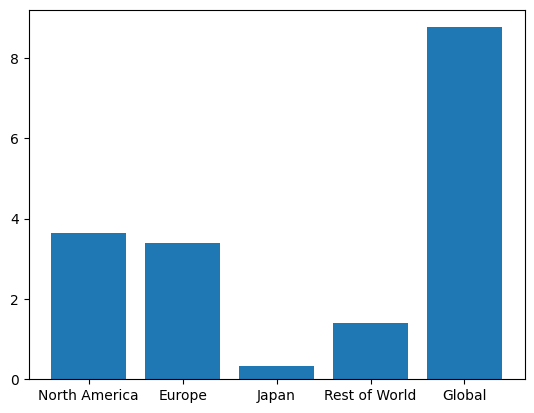

In [78]:
spiderman = ps4.loc[ps4["Game"] ==  "Spider-Man (PS4)"] 
regions = [ "North America" , "Europe" , "Japan" , "Rest of World", "Global"]
spiderman_sales = spiderman[regions].iloc[0]
plt.bar(spiderman_sales.index, spiderman_sales.values)

Publisher  Activision  Capcom  EA Sports  Namco Bandai Games  \
Year                                                           
2013.0           4.84     NaN       4.66                 NaN   
2014.0          14.60    0.00       9.19                0.20   
2015.0          19.90    1.03      12.39                9.71   
2016.0          10.15    2.52       5.11                8.04   
2017.0          22.95    5.29      15.23                4.28   
2018.0            NaN    4.67       0.97                2.64   
2019.0            NaN     NaN        NaN                 NaN   
2020.0            NaN    0.00        NaN                 NaN   

Publisher  Sony Interactive Entertainment  Warner Bros. Interactive  
Year                                                                 
2013.0                                NaN                       NaN  
2014.0                                NaN                       NaN  
2015.0                                NaN                      6.56  
2016.0   

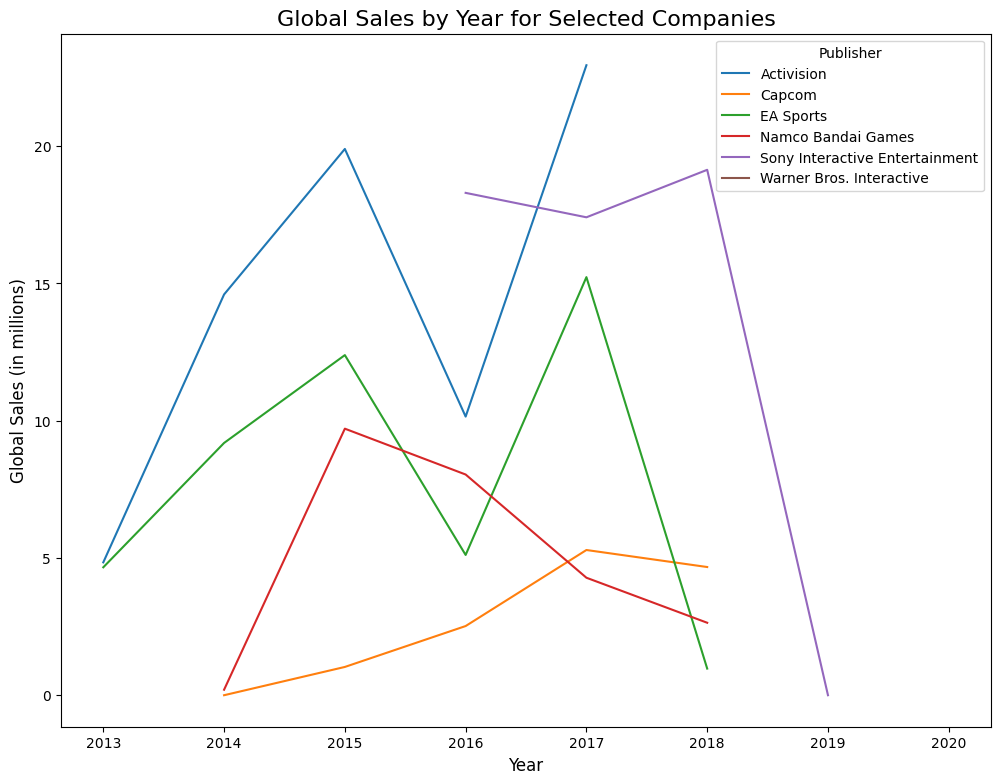

In [79]:
# Plot a line plot to compare the global sales made through different years by the following companies
# (Activision, EA Sports, Sony Interactive Entertainment, Namco Bandai Games, Capcom, Warner Bros. Interactive)
companies = ["Activision", "EA Sports", "Sony Interactive Entertainment", "Namco Bandai Games", "Capcom", "Warner Bros. Interactive"]
company_details = ps4.loc[ps4["Publisher"].isin(companies)].sort_values("Year")
company_details.groupby(["Publisher", "Year"])["Global"].sum().reset_index()

#This wont work because of duplicate values 
# company_sales_pivot = company_details.pivot(index="Year", columns="Publisher", values="Global" ,aggfunc ="sum")

company_sales_pivot = company_details.pivot_table(index="Year", columns="Publisher", values="Global", aggfunc="sum")
print(company_sales_pivot)

# plt.figure(figsize=(10, 6))
company_sales_pivot.plot(kind="line",  figsize=(12, 9))

# Adding labels and title
plt.title("Global Sales by Year for Selected Companies", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Global Sales (in millions)", fontsize=12)
plt.legend(title="Publisher", fontsize=10)

# Showing the plot
plt.show()

                        Publisher    Year  Global
0                          Capcom  2018.0    4.67
1                       EA Sports  2018.0    0.97
2              Namco Bandai Games  2018.0    2.64
3  Sony Interactive Entertainment  2018.0   19.14


<AxesSubplot:ylabel='Global'>

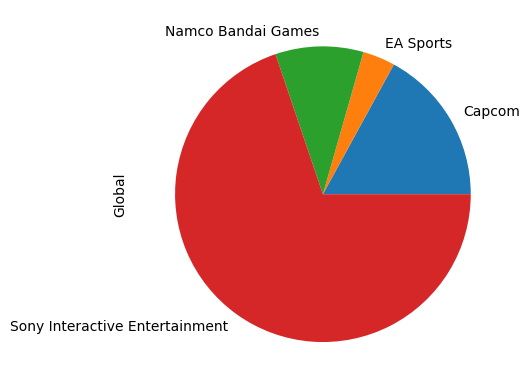

In [222]:
companies = ["Activision", "EA Sports", "Sony Interactive Entertainment", "Namco Bandai Games", "Capcom", "Warner Bros. Interactive"]
company_details = ps4.loc[ps4["Publisher"].isin(companies)]
company_details = company_details.loc[company_details["Year"] == 2018]
# print(company_details)

company_details = company_details.groupby(["Publisher", "Year"])["Global"].sum().reset_index()
print(company_details)

company_details.set_index("Publisher")["Global"].plot(kind = "pie")